# House Prices Prediction

## Importing:

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# get_description() is a function to get the description of any column name or a value.
# It takes the column/value name, or any list of them:
from data_description import get_description

%matplotlib inline
sns.set_style('darkgrid')

### Importing the 'train.csv' and 'test.csv' files:

In [44]:
train = pd.read_csv('data/train.csv', index_col='Id')
test = pd.read_csv('data/test.csv', index_col='Id')

In [45]:
# X_train is the training features data
X_train = train.drop(['SalePrice'], axis=1)
# y is the target variable [SalePrice]
y = pd.DataFrame(train['SalePrice'])

# X is the combination of the features data from 'train' and 'test'. This is where we'll deal with the NaV values.
X = pd.concat([X_train, test], axis=0)


## Cleaning the Dataset:

### Checking Missing Values:

In [46]:
missing_count = X.isna().sum(axis=0)
missing_percent = missing_count / len(X) * 100

missing_data = pd.DataFrame({
    'NaN Count': missing_count,
    'Percentage [%]': missing_percent
}).sort_values(by='NaN Count', ascending=False)
missing_data.index.name = 'Column Name'

missing_data = missing_data[missing_data['NaN Count'] > 0]
missing_data

,NaN Count,Percentage [%]
Column Name,,
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageYrBlt,159,5.447071
GarageFinish,159,5.447071
GarageQual,159,5.447071


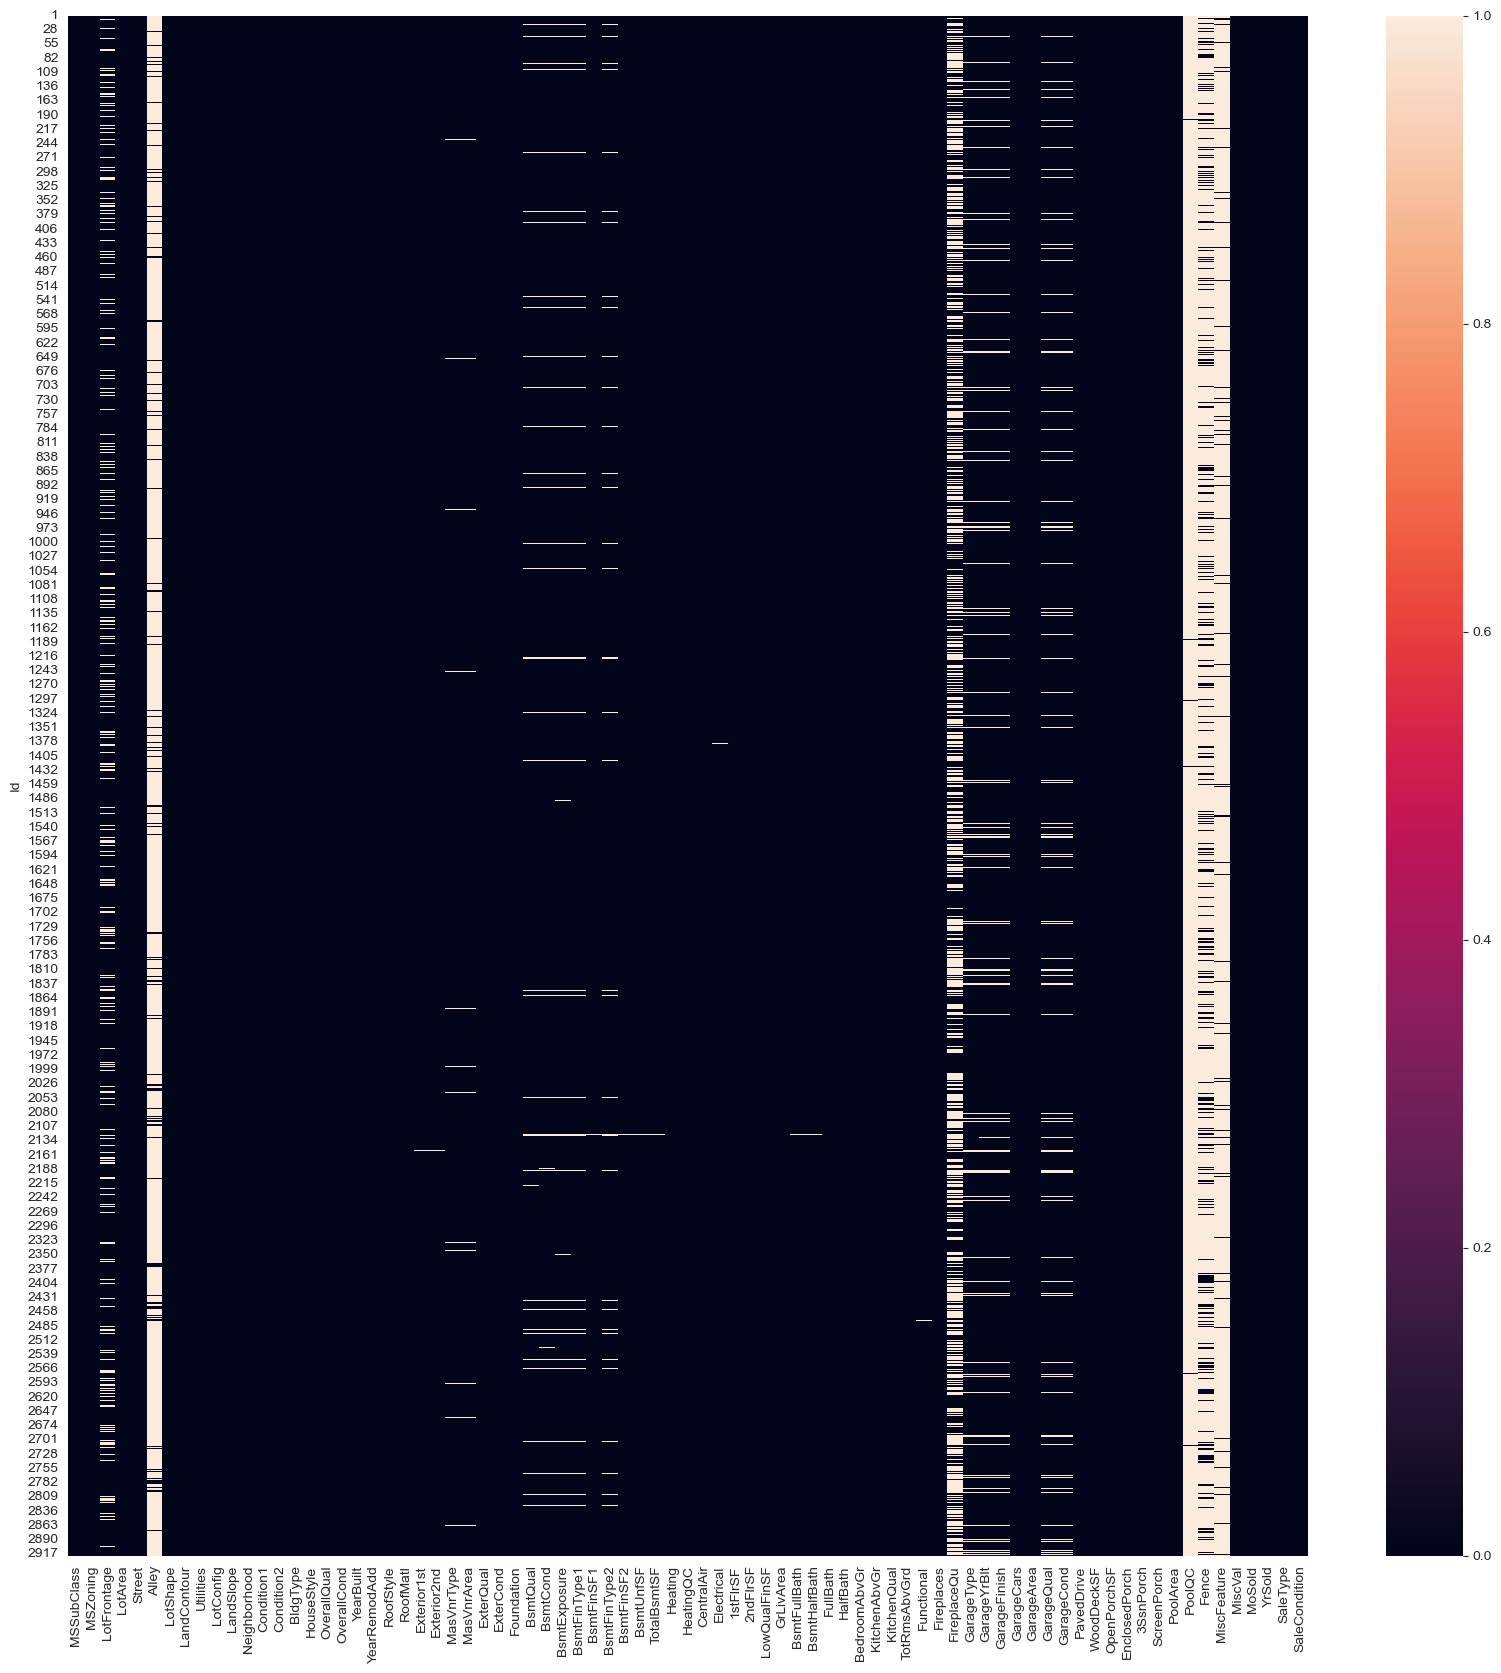

In [47]:
plt.figure(figsize=(20,20))
sns.heatmap(X.isnull())
plt.show()

### Imputing NaN Values:

1. For numerical variables, replace with zero, when the house doesn't have the feature.

In [48]:
na_zero = ['MasVnrArea']

X[na_zero] = X[na_zero].fillna(0)

2. For numerical variables, replace with the median, when the NaN means the value is missing.


In [49]:
na_median = ['LotFrontage']

X[na_median] = X[na_median].fillna(X[na_median].median())

3 For categorical variables, replace with 'None', when the house doesn't have the feature.


In [50]:
X['Alley'] = X['Alley'].fillna('No_Alley')

X['MasVnrType'] = X['MasVnrType'].fillna('No_Bsmt')
X['BsmtQual'] = X['BsmtQual'].fillna('No_Bsmt')
X['BsmtCond'] = X['BsmtCond'].fillna('No_Bsmt')
X['BsmtExposure'] = X['BsmtExposure'].fillna('No_Bsmt')
X['BsmtFinType1'] = X['BsmtFinType1'].fillna('No_Bsmt')
X['BsmtFinType2'] = X['BsmtFinType2'].fillna('No_Bsmt')
X['BsmtFullBath'] = X['BsmtFullBath'].fillna('No_Bsmt')
X['BsmtHalfBath'] = X['BsmtHalfBath'].fillna('No_Bsmt')

X["GarageCond"] = X["GarageCond"].fillna("No_Garage")
X['GarageType'] = X['GarageType'].fillna('No_Garage')
X['GarageFinish'] = X['GarageFinish'].fillna('No_Garage')
X['GarageQual'] = X['GarageQual'].fillna('No_Garage')
X['GarageCond'] = X['GarageCond'].fillna('No_Garage')

X["PoolQC"] = X["PoolQC"].fillna("No_Pool")
X["Fence"] = X["Fence"].fillna("No_Fence")
X["MiscFeature"] = X["MiscFeature"].fillna("No_MiscFeature")
X['FireplaceQu'] = X['FireplaceQu'].fillna('No_Fireplace')



4. For categorical variables, replace with the mode (most accuring value), where NaN means value is missing.


In [51]:
X['MSZoning'].fillna(X['MSZoning'].mode()[0], inplace=True)
X['Utilities'].fillna(X['Utilities'].mode()[0], inplace=True)
X['Exterior1st'].fillna(X['Exterior1st'].mode()[0], inplace=True)
X['Exterior2nd'].fillna(X['Exterior2nd'].mode()[0], inplace=True)
X['Electrical'].fillna(X['Electrical'].mode()[0], inplace=True)
X['Functional'].fillna(X['Functional'].mode()[0], inplace=True)
X['SaleType'].fillna(X['SaleType'].mode()[0], inplace=True)
X['GarageCars'].fillna(X['GarageCars'].mode()[0], inplace=True)
X['GarageArea'].fillna(X['GarageArea'].mode()[0], inplace=True)
X['BsmtFinSF1'].fillna(X['BsmtFinSF1'].mode()[0], inplace=True)
X['BsmtFinSF2'].fillna(X['BsmtFinSF2'].mode()[0], inplace=True)
X['BsmtUnfSF'].fillna(X['BsmtUnfSF'].mode()[0], inplace=True)
X['TotalBsmtSF'].fillna(X['TotalBsmtSF'].mode()[0], inplace=True)
X['KitchenQual'].fillna(X['KitchenQual'].mode()[0], inplace=True)

5. 'GarageYrBlt' will be replaced with 'YearBlt'.

In [52]:
X['GarageYrBlt'] = X['GarageYrBlt'].fillna(X['YearBuilt'])

#### After Imputung:

In [53]:
X.isna().sum(axis=0).sum()

0

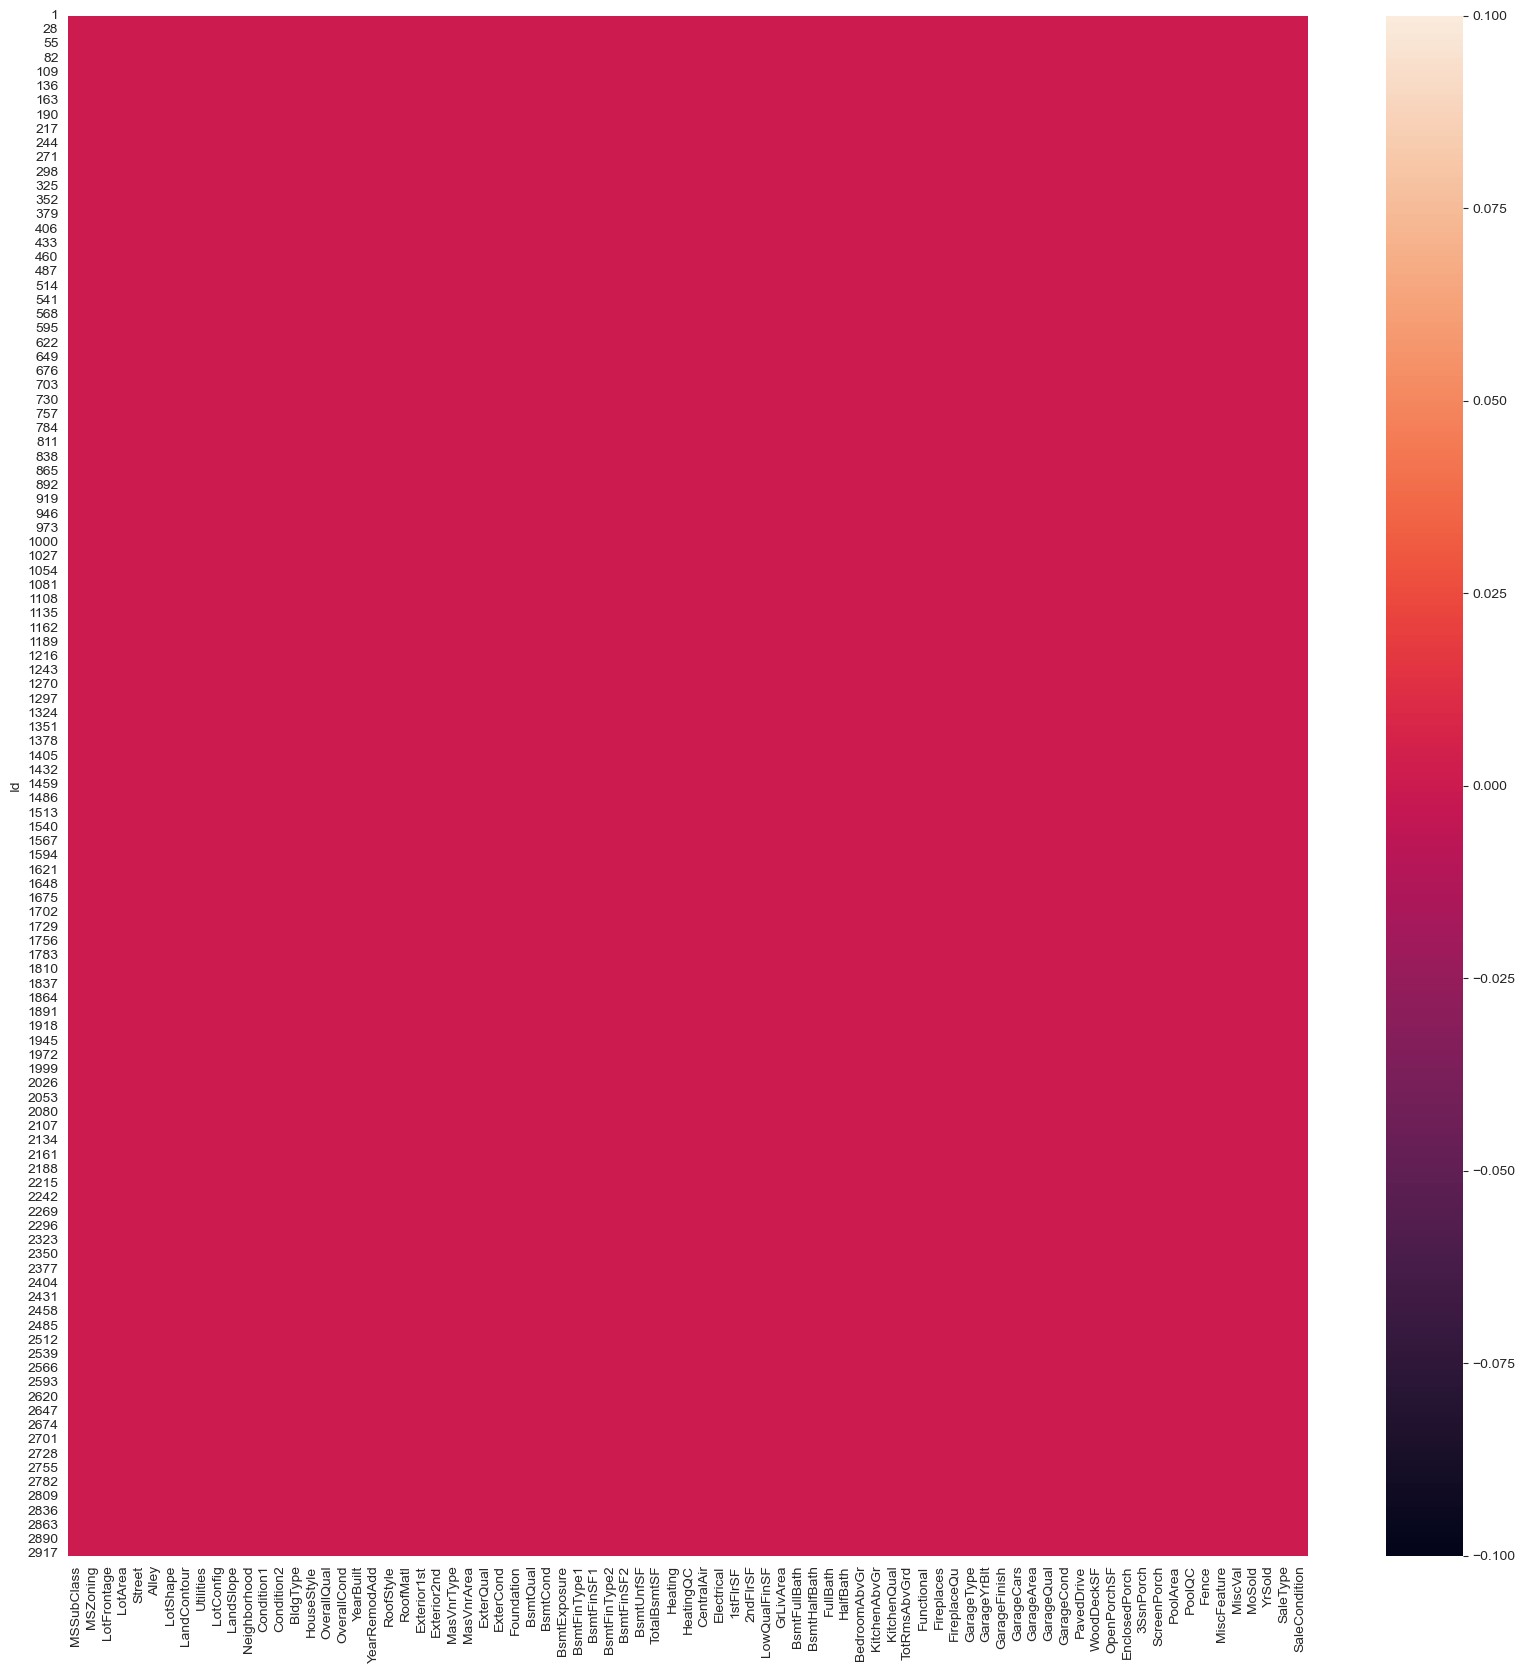

In [54]:
plt.figure(figsize=(20,20))
sns.heatmap(X.isnull())
plt.show()

#### Saving the clean dataset to new files:

In [55]:
# clean_dataset has both 'train.csv' and 'test.csv' after filling the missing values.
clean_dataset = pd.concat([X, y], axis=1).reset_index()
clean_dataset.to_csv('data/clean_dataset.csv')